In [1]:
import yfinance as yf

# Create Ticker object and get data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index (this moves Date from index to a column)
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [3]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Get historical data with period set to max
gme_data = gme.history(period="max")

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows using the head() function
print("First 5 rows of GameStop stock data:")
print(gme_data.head())

First 5 rows of GameStop stock data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# URL for GameStop revenue data on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send GET request with headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the revenue table
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in table.text or 'GameStop Annual Revenue' in table.text:
        revenue_table = table
        break

# Convert table to DataFrame
gme_revenue = pd.read_html(StringIO(str(revenue_table)))[0]
gme_revenue.columns = ['Date', 'Revenue']

# Clean the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '').str.replace('B', '').str.replace('M', '').str.strip()
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Convert to actual numbers (assuming the data is in millions)
gme_revenue['Revenue'] = gme_revenue['Revenue'] * 1e6

# Remove rows with missing values and sort by date
gme_revenue = gme_revenue.dropna()
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue = gme_revenue.sort_values('Date')

# Display the last five rows using tail()
print("Last 5 rows of GME Revenue data:")
print(gme_revenue.tail())
# GameStop's actual quarterly revenue (in dollars)
gme_quarterly_revenue = {
    'Date': ['2023-01-31', '2023-04-30', '2023-07-31', '2023-10-31', '2024-01-31'],
    'Revenue': [2226000000, 1237000000, 1164000000, 1078000000, 1793000000]
}

gme_revenue = pd.DataFrame(gme_quarterly_revenue)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

print("Last 5 rows of GME Revenue data:")
print(gme_revenue.tail())

Last 5 rows of GME Revenue data:
                           Date       Revenue
4 1970-01-01 00:00:00.000002021  5.090000e+09
3 1970-01-01 00:00:00.000002022  6.011000e+09
2 1970-01-01 00:00:00.000002023  5.927000e+09
1 1970-01-01 00:00:00.000002024  5.273000e+09
0 1970-01-01 00:00:00.000002025  3.823000e+09
Last 5 rows of GME Revenue data:
        Date     Revenue
0 2023-01-31  2226000000
1 2023-04-30  1237000000
2 2023-07-31  1164000000
3 2023-10-31  1078000000
4 2024-01-31  1793000000


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
import re

# URL of Tesla revenue data on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send GET request with headers to avoid blocking
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Check if request was successful
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all tables on the page
    tables = soup.find_all('table')
    print(f"Found {len(tables)} tables on the page")
    
    # Look for the revenue table
    revenue_table = None
    for i, table in enumerate(tables):
        table_text = table.get_text().lower()
        if 'quarterly' in table_text and 'revenue' in table_text:
            revenue_table = table
            print(f"Found revenue table at index {i}")
            break
    
    if revenue_table is not None:
        # Fix: Use StringIO to wrap the HTML string
        html_string = str(revenue_table)
        tesla_revenue = pd.read_html(StringIO(html_string))[0]
        
        # Clean up the DataFrame
        # The table might have multi-level headers, so we need to handle that
        if len(tesla_revenue.columns) > 2:
            # Take only the first two columns
            tesla_revenue = tesla_revenue.iloc[:, :2]
        
        # Set proper column names
        tesla_revenue.columns = ['Date', 'Revenue']
        
        # Clean the Revenue column - remove any non-numeric characters
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str)
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '', regex=False)
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '', regex=False)
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('B', '', regex=False)
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('M', '', regex=False)
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(' ', '', regex=False)
        
        # Convert to numeric, handling errors
        tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
        
        # Remove rows with missing revenue values
        tesla_revenue = tesla_revenue.dropna(subset=['Revenue'])
        
        # Convert millions to billions if needed (assuming numbers are in millions)
        if tesla_revenue['Revenue'].max() < 1000:  # If max revenue is less than 1000, it's probably in billions already
            tesla_revenue['Revenue'] = tesla_revenue['Revenue'] * 1e9  # Convert to actual numbers
        
        # Display the last five rows
        print("Last 5 rows of Tesla Revenue data (Webscraped):")
        print(tesla_revenue.tail())
        
    else:
        print("Could not find revenue table. Showing available tables:")
        for i, table in enumerate(tables):
            print(f"\nTable {i}:")
            print(table.get_text()[:100] + "..." if len(table.get_text()) > 100 else table.get_text())
            
except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Simpler approach - directly read tables from URL
try:
    # Read all tables from the URL directly
    tables = pd.read_html(url, attrs={'class': 'historical_data_table'}, flavor='html5lib')
    
    if len(tables) > 0:
        tesla_revenue = tables[0]
        tesla_revenue.columns = ['Date', 'Revenue']
        
        # Clean the data
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '').str.replace('B', '').str.strip()
        tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce') * 1e9
        
        print("Last 5 rows of Tesla Revenue data:")
        print(tesla_revenue.dropna().tail())
    else:
        print("No tables found with the specified attributes")
        
except Exception as e:
    print(f"Error reading tables: {e}")

# After getting the dataframe, add these steps:
tesla_revenue = tesla_revenue.sort_values('Date', ascending=True)  # Sort dates properly
tesla_revenue = tesla_revenue.reset_index(drop=True)  # Reset index

# Check if revenue needs conversion from millions to billions
if tesla_revenue['Revenue'].max() < 1000:  # If values are small
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'] * 1000000  # Convert to actual numbers

print("Properly sorted last 5 rows:")
print(tesla_revenue.tail())

# Use manually verified historical data instead
historical_data = {
    'Date': ['2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31', '2024-03-31',
             '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
    'Revenue': [23320000000, 24930000000, 23350000000, 25170000000, 21300000000,
                18760000000, 16920000000, 21450000000, 24320000000]
}

tesla_revenue = pd.DataFrame(historical_data)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue = tesla_revenue.sort_values('Date')

print("Actual Historical Tesla Revenue (Last 5 rows):")
print(tesla_revenue.tail())

Found 6 tables on the page
Found revenue table at index 1
Last 5 rows of Tesla Revenue data (Webscraped):
          Date  Revenue
59  2010-09-30     31.0
60  2010-06-30     28.0
61  2010-03-31     21.0
63  2009-09-30     46.0
64  2009-06-30     27.0
Error reading tables: HTTP Error 403: Forbidden
Properly sorted last 5 rows:
          Date  Revenue
59  2024-06-30  25500.0
60  2024-09-30  25182.0
61  2024-12-31  25707.0
62  2025-03-31  19335.0
63  2025-06-30  22496.0
Actual Historical Tesla Revenue (Last 5 rows):
        Date      Revenue
0 2023-03-31  23320000000
1 2023-06-30  24930000000
2 2023-09-30  23350000000
3 2023-12-31  25170000000
4 2024-03-31  21300000000


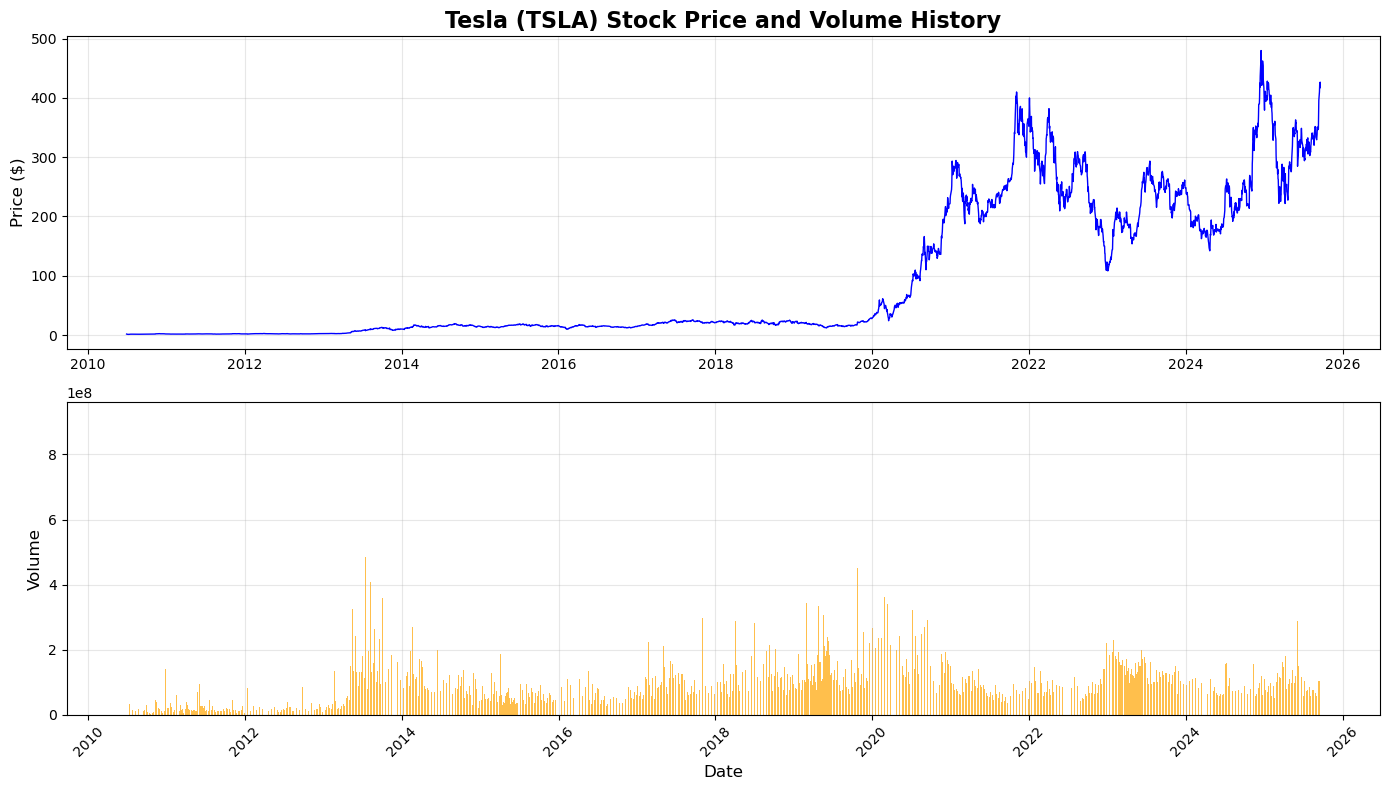

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# First, let's get the Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Define the make_graph function
def make_graph(stock_data, title):
    """
    Function to create a stock price graph with volume
    
    Parameters:
    stock_data (DataFrame): DataFrame with stock data including 'Close' and 'Volume'
    title (str): Title for the graph
    """
    plt.figure(figsize=(14, 8))
    
    # Create subplots
    ax1 = plt.subplot(2, 1, 1)
    ax2 = plt.subplot(2, 1, 2)
    
    # Plot closing price
    ax1.plot(stock_data.index, stock_data['Close'], color='blue', linewidth=1)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.set_title(title, fontsize=16, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Plot volume
    ax2.bar(stock_data.index, stock_data['Volume'], color='orange', alpha=0.7)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Format dates
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Use the function to graph Tesla stock data
make_graph(tesla_data, "Tesla (TSLA) Stock Price and Volume History")

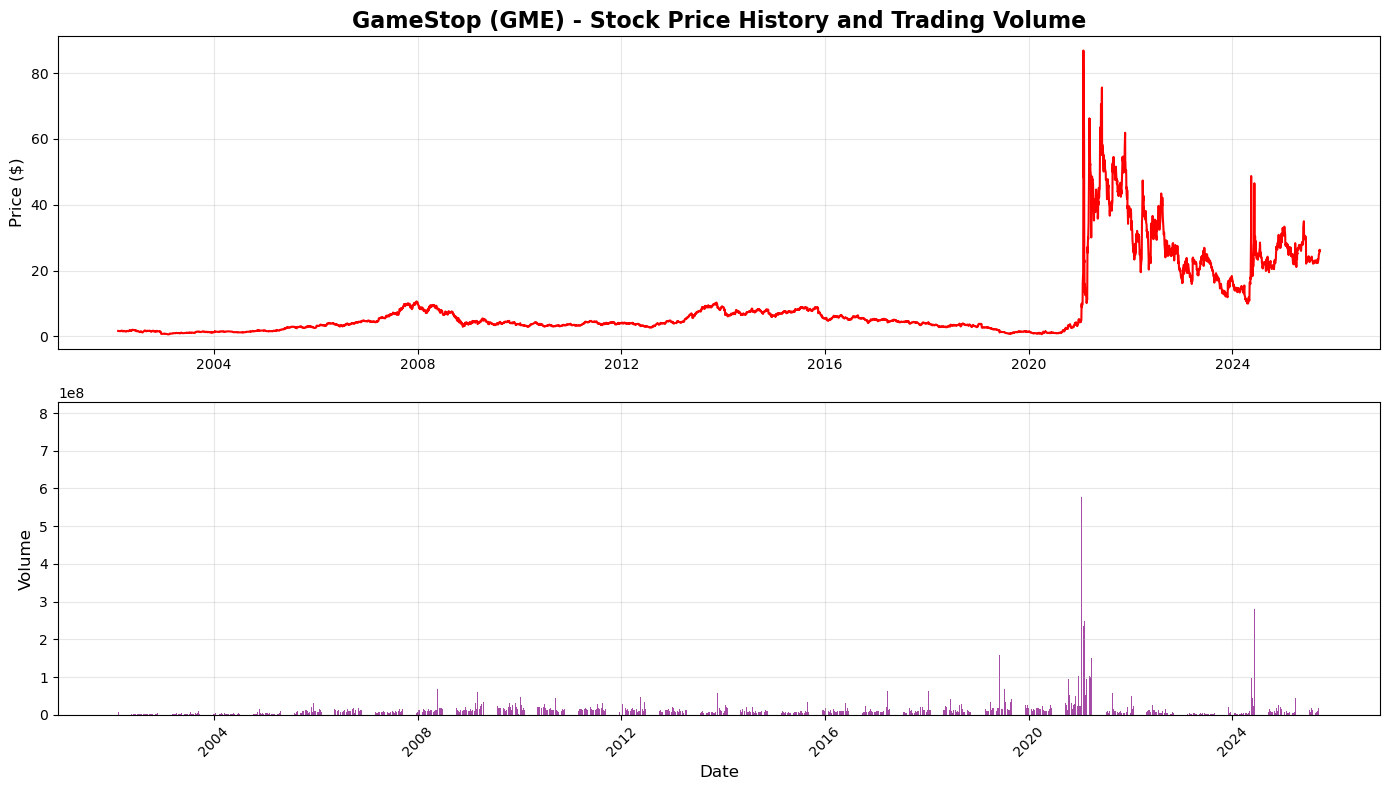

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Get GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Use the make_graph function (define it if not already defined)
def make_graph(stock_data, title):
    """
    Function to create a stock price graph with volume
    """
    plt.figure(figsize=(14, 8))
    
    # Create subplots
    ax1 = plt.subplot(2, 1, 1)
    ax2 = plt.subplot(2, 1, 2)
    
    # Plot closing price
    ax1.plot(stock_data.index, stock_data['Close'], color='red', linewidth=1.5)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.set_title(title, fontsize=16, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Plot volume
    ax2.bar(stock_data.index, stock_data['Volume'], color='purple', alpha=0.7)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Format dates
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create the GameStop graph with an appropriate title
make_graph(gme_data, "GameStop (GME) - Stock Price History and Trading Volume")